In [1]:
from traitlets.config.manager import BaseJSONConfigManager
# To make this work, replace path with your own:
# On the command line, type juypter --paths to see where your nbconfig is stored
# Should be in the environment in which you install reveal.js
path = " /Users/Blake/.virtualenvs/cme193/bin/../etc/jupyter"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
              'theme': 'simple',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
    })

{'start_slideshow_at': 'selected', 'theme': 'simple', 'transition': 'zoom'}

In [2]:
%%HTML 
<link rel="stylesheet" type="text/css" href="custom.css">

# CME 193 
## Introduction to Scientific Python
## Spring 2018

<br>

## Lecture 6
-------------
## Pandas

# Lecture 6 Contents

* Administration
* Pandas
    - Series:
    - DataFrames:
        - Creation
        - Indexing/Selection
        - Essential & Basic Functionality
    - Import Export
    - Concatenating Dataframes
    - Function Applications / Grouping
    - Plotting
    - Interactive example
* Exercises

---

## Remaining Schedule


| Date | |Description |
| ------:| -----------:|
|  || ```Lecture``` ```6```: Pandas + interactive example|
| || ```Lecture``` ```7```: Machine learning & optimization |
| || ```Lecture``` ```8```: Poll (More Packages for ML Deep Learning or Multithreading) |
||||
| 5/15 || Exercises and HW2/Project due |

# HW1 

Awesome work. You should expect your grade to be the same grade that the graders returned if your ran locally.
I will post these to Canvas shortly.

# HW2 

Posted on the course website https://web.stanford.edu/~jacobp2/src/html/homework.html

# Project

### You have the option to complete a project in place of HW2

Posted on the course website https://web.stanford.edu/~jacobp2/src/html/project.html

#### Project Proposal due:  ``` 4/30```
#### Final deliverables due: ``` 5/15``` 

## Remaining Schedule

### Office Hours

- I will continue to hold office hours for the class time until the project is due
- Please do email me along the way with any Project/HW questions you might have.

### Any questions?

# Pandas

## What is Pandas?
- Introduced in 2011, Pandas is a Python package providing high-performance, easy-to-use data structures and data analysis tools
- Motivated by R, pandas came out of the Finance industry. Now a key component to SciPy.
- Provides fast, flexible, and expressive data structures designed to make working with relational or labeled data both easy and intuitive

# Let's do a showcase

## Pandas
- Designed for working with tabular or structured data (like R dataframe, SQL table, Excel spreadsheet, ...):
- Import, clean and serialize data for storage
- Conduct exploratory analysis (along with Jupyter + matplotlib + ...)
- Model your data (together with scikit-learn, statsmodels, ...)

## Pandas
- Pandas is like NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
- Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

## Key features
- File I/O - integrations with multiple file formats
- Working with missing data (.dropna(), pd.isnull())
- Normal table operations: merging and joining, groupby functionality, reshaping via stack, and pivot_tables,
- Time series-specific functionality: 
 - date range generation and frequency conversion, moving window statistics/regressions, date shifting and lagging, etc.
- Built in Matplotlib integration

## Other strengths
- Strong community, support, and documentation
- Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

# Pandas for Data Analysis

- R is a language dedicated to statistics. Python is a general-purpose language
with statistics modules. 
- R has more statistical analysis features than Python,
and specialized syntaxes. 

However, when it comes to building complex analysis
pipelines that mix statistics with e.g. image analysis, text mining, or control
of a physical experiment, the richness of Python is an invaluable asset.

## Pandas Documentation

Check out the documentation here:

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

(This tutorial is derived mainly from pandas doc)

In [15]:
import pandas as pd
import numpy as np
end_string = '\n' + '-'*50 + '\n'

## Object Basics & Creation

| Name | Dimensions | Description  |
| ------:| -----------:|
| ```pd.Series``` | 1 | 1D labeled homogeneously-typed array |
| ```pd.DataFrame```  | 2| General 2D labeled, size-mutable tabular structure |
| ```pd.Panel``` | 3|  General 3D labeled, also size-mutable array |


# Series
## What are they?
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
- Basic method to create a series: 
```python 
s = pd.Series(data, index = index) ```
- Data Can be many things:
    * A Python Dictionary
    * An ndarray (or reg. list)
    * A scalar 
- The passed index is a list of axis labels (which varies on what data is)

# Series Creation From ndarray 

- Index must be of same length as data. If no index is passed, it will automatically be [0, ..., len(data) - 1]

In [4]:
first_series = pd.Series([1,2,4,8,16,32,64])
print(type(first_series))
print(first_series)

<class 'pandas.core.series.Series'>
0     1
1     2
2     4
3     8
4    16
5    32
6    64
dtype: int64


In [5]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print('-'*50)
print(s.index)

a   -0.390296
b    0.768452
c   -1.006089
d    0.068162
e    0.346945
dtype: float64
--------------------------------------------------
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


# Series creation if data is a dictionary
- If Data is a dictionary, if index is passed the values in data corresponding to the labels in the index will be pulled out, otherwise an index will be constructed from the sorted keys of the dict

In [239]:
d = {'a': [0., 0], 'b': {'1':1.}, 'c': 2.}
pd.Series(d)

a      [0.0, 0]
b    {'1': 1.0}
c             2
dtype: object

In [12]:
pd.Series(d, index = ['a', 'b', 'c', 'd'])

a    0.0
b    1.0
c    2.0
d    NaN
dtype: float64

# Series Creation if data is a scalar

- Index must be provided. The value will be repeated to match the length of the index

In [13]:
pd.Series(5, index = ['a', 'b', 'c'])

a    5
b    5
c    5
dtype: int64

## Series Intro
- Series acts similar to a numpy array, and is valid arguments to most numpy functions. 
- Slicing also slices the index
- Short Intro, back to this later

In [16]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    1.318826
b    1.641419
c    0.418586
d   -0.480161
e    0.227916
dtype: float64


In [19]:
print(s[0], end = end_string)
# slicing
print(s[:3], end =end_string)

1.3188258962652732
--------------------------------------------------
a    1.318826
b    1.641419
c    0.418586
dtype: float64
--------------------------------------------------


In [18]:
# conditional max
print(s[ s > s.mean()], end = end_string)
# elementwise function
print(np.exp(s), end = end_string)

a    1.318826
b    1.641419
dtype: float64
--------------------------------------------------
a    3.739029
b    5.162487
c    1.519810
d    0.618684
e    1.255980
dtype: float64
--------------------------------------------------


## Series is also dict like
- A Series is like a fixed-size dict in that you can get and set values by index label

In [20]:
print(s, end = end_string)
print(s['a'], end = end_string)

a    1.318826
b    1.641419
c    0.418586
d   -0.480161
e    0.227916
dtype: float64
--------------------------------------------------
1.3188258962652732
--------------------------------------------------


In [21]:
s['e'] = 12
print(s, end = end_string)
print('e' in s, end = end_string)
print(s.get('f', None), end = end_string)
print(s.get('e', None), end = end_string)

a     1.318826
b     1.641419
c     0.418586
d    -0.480161
e    12.000000
dtype: float64
--------------------------------------------------
True
--------------------------------------------------
None
--------------------------------------------------
12.0
--------------------------------------------------


### Series Attributes 

- Get the index : 
```python 
s.index ``` 
- Get the values :
``` python 
s.values ``` 
- Find the shape : 
``` python 
s.shape ``` 

In [22]:
print(s.index, end = end_string)
print(s.values, end = end_string)
print(s.shape)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
--------------------------------------------------
[ 1.3188259   1.64141852  0.41858558 -0.48016125 12.        ]
--------------------------------------------------
(5,)


# Series iteration

In [23]:
for idx,val in s.iteritems():
    print(idx,val, end = end_string)

a 1.3188258962652732
--------------------------------------------------
b 1.6414185192421322
--------------------------------------------------
c 0.4185855826745388
--------------------------------------------------
d -0.4801612452106045
--------------------------------------------------
e 12.0
--------------------------------------------------


# Sorting 
- by index  
``` python
Series.sort_index() ``` 
- by values 
``` python
Series.sort_values() ``` 

In [24]:
print(s.sort_index(), end = end_string)
print(s.sort_values(), end = end_string)

a     1.318826
b     1.641419
c     0.418586
d    -0.480161
e    12.000000
dtype: float64
--------------------------------------------------
d    -0.480161
c     0.418586
a     1.318826
b     1.641419
e    12.000000
dtype: float64
--------------------------------------------------


# Value Counts 
- Find unique elemnts and count occurence ``` python
Series.value_counts() ```

In [25]:
s = pd.Series([0,0,0,1,1,1,2,2,2,2])
print(s.value_counts())

2    4
1    3
0    3
dtype: int64


## Many more...

#### Pretty much anything you can do with a numpy array 
- Series.mean()
- Series.median()
- Series.mode()
- Series.nsmallest(num)
- Series.max ...

In [26]:
print(s.min(),end = end_string)
print(s.max(), end = end_string)

0
--------------------------------------------------
2
--------------------------------------------------


In [6]:
mylist = [1,1,1,1,1,2,3]

6.2
dictionary_2 = {}
for val in mylist:
    if val in dictionary_2.keys():
        dictionary_2[val] += 1
    else:
        dictionary_2[val] =1
    

6.3
dictionary_3 = {}
for val in mylist:
    dictionary_3[val] = dictionary_3.get(val,0) + 1

print(dictionary_3)
print(dictionary_2)

{1: 5, 2: 1, 3: 1}
{1: 5, 2: 1, 3: 1}


# DataFrame
- DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.
- You can create a series from:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy array
    - A list of dictionaries
    - A Series
    - Another Dataframe
``` python
df = pd.DataFrame(data, index = index, columns = columns)
```
- ```index```/ ``` columns ``` is a list of the row/ column labels. If you pass an index and/ or columns, you are guarenteeing the index and /or column of the df. 
- If you do not pass anything in, the input will be constructed by "common sense" rules

#### [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

# DataFrame Creation From dict of series or dicts
- The index of the resulting DataFrame will be the union of the indices of the various Series. If there are any nested dicts, these will be first converted to Series. 
- If no columns are passed, the columns will be the sorted list of dict keys.

In [240]:
# Create a dictionary of series
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']), 
     'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}


d= {'one': {'a': 1, 'b': 2, 'c':3}, 
     'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}
# Columns are dictionary keys, indices and values obtained from series
df = pd.DataFrame(d)
# Notice how it fills the column one with NaN for d
print(df)

   one  two
a  1.0    0
b  2.0    1
c  3.0    2
d  NaN    3


In [28]:
print(pd.DataFrame(d, index = ['d', 'b', 'a']), end = end_string)
print(pd.DataFrame(d, index = ['d', 'b', 'a'], columns = ['two', 'three']),
      end = end_string)

   one  two
d  NaN    3
b  2.0    1
a  1.0    0
--------------------------------------------------
   two three
d    3   NaN
b    1   NaN
a    0   NaN
--------------------------------------------------


In [29]:
# Accessing attributes
print(df.index, end = end_string)
print(df.columns,end = end_string)
print(df.shape)

Index(['a', 'b', 'c', 'd'], dtype='object')
--------------------------------------------------
Index(['one', 'two'], dtype='object')
--------------------------------------------------
(4, 2)


# From dict of ndarray / lists
- The ndarrays must all be the same length. 
- If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [30]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


# From a list of dicts


In [77]:
data = []
for i in range(100):
    data.append({'Column' + str(j):np.random.randint(100) for j in range(5)})
    
data[:5]

[{'Column0': 54, 'Column1': 86, 'Column2': 97, 'Column3': 19, 'Column4': 45},
 {'Column0': 18, 'Column1': 1, 'Column2': 90, 'Column3': 94, 'Column4': 53},
 {'Column0': 27, 'Column1': 51, 'Column2': 0, 'Column3': 53, 'Column4': 10},
 {'Column0': 42, 'Column1': 0, 'Column2': 14, 'Column3': 13, 'Column4': 1},
 {'Column0': 92, 'Column1': 5, 'Column2': 24, 'Column3': 41, 'Column4': 85}]

In [78]:
# Creation from a list of dicts
df = pd.DataFrame(data)
print(df.head(), end = end_string)

    Column0  Column1  Column2  Column3  Column4
0        54       86       97       19       45
1        18        1       90       94       53
..      ...      ...      ...      ...      ...
3        42        0       14       13        1
4        92        5       24       41       85

[5 rows x 5 columns]
--------------------------------------------------


In [80]:
# Only certain columns
df = pd.DataFrame(data, columns = ['Column0', 'Column1'])
print(df.head(), end = end_string)

    Column0  Column1
0        54       86
1        18        1
..      ...      ...
3        42        0
4        92        5

[5 rows x 2 columns]
--------------------------------------------------


## Attributes

- ``` df.index ``` : the row index of df
- ``` df.columns ``` : the columns of df
- ``` df.shape ``` : the shape of the df
- ``` df.values ``` : numpy array of values

# Column Selection, Addition and Deletion
- You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations

In [81]:
# Adding and accessing columns 
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']), 
     'two': pd.Series(range(4), index = ['a','b', 'c', 'd'])}
df = pd.DataFrame(d)
# multiply 
df['three'] =  df['one']*df['two']
# Create a boolean flag
df['flag'] = df['one'] > 2
print(df.head())

   one  two  three   flag
a  1.0    0    0.0  False
b  2.0    1    2.0  False
c  3.0    2    6.0   True
d  NaN    3    NaN  False


In [39]:
# inserting column in specified location, with values
df.insert(1, 'bar', df['one'][:2])
print(df.head())

   one  bar  two  three   flag
a  1.0  1.0    0    0.0  False
b  2.0  2.0    1    2.0  False
c  3.0  NaN    2    6.0   True
d  NaN  NaN    3    NaN  False


In [40]:
# Deleting Columns  
three = df.pop('three')
print(df.head(), end = end_string)
# Propation of values
df['foo'] = 'bar'
print(df, end = end_string)

   one  bar  two   flag
a  1.0  1.0    0  False
b  2.0  2.0    1  False
c  3.0  NaN    2   True
d  NaN  NaN    3  False
--------------------------------------------------
   one  bar  two   flag  foo
a  1.0  1.0    0  False  bar
b  2.0  2.0    1  False  bar
c  3.0  NaN    2   True  bar
d  NaN  NaN    3  False  bar
--------------------------------------------------


## Indexing and Selection 

- 4 methods ``` [], ix, iloc, loc ```

| Operation  | Syntax       | Result | 
|----|----------------------| ---------------------------|
| Select Column | df[col]   |    Series                      |
| Select Row by Label | df.loc[label] | Series  |
| Select Row by Integer Location | df.iloc[idx] |      Series                    |
| Slice rows | df[5:10]        |                        DataFrame  | 
| Select rows by boolean | df[mask]   | DataFrame        |

- Note all the operations below are valid on series as well restricted to one dimension

## Simplest form Of Indexing: []
- Series: selecting a label: s[label] 
- DataFrame: selection single or multiple columns: 
``` python 
df['col'] or df[['col1', 'col2']] ``` 
- DataFrame: slicing the rows:
``` python
df['rowlabel1': 'rowlabel2'] ``` 
or 
``` python 
df[boolean_mask] ``` 

In [243]:
# Lets create a data frame
pd.options.display.max_rows = 4
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C','D'])
df.head()

,A,B,C,D
2000-01-01,2.335268,-0.060393,0.250966,0.439735
2000-01-02,0.548636,-0.161617,0.953262,0.387561
...,...,...,...,...
2000-01-04,-0.535366,0.933438,-0.133318,0.740686
2000-01-05,-1.864224,-0.698324,-0.333128,1.297322


In [244]:
# column  'A
df['A']

2000-01-01    2.335268
2000-01-02    0.548636
                ...   
2000-01-07    0.321372
2000-01-08   -0.521493
Freq: D, Name: A, Length: 8, dtype: float64

In [245]:
# multiple column 
df[['A', 'B']]

,A,B
2000-01-01,2.335268,-0.060393
2000-01-02,0.548636,-0.161617
...,...,...
2000-01-07,0.321372,0.717987
2000-01-08,-0.521493,1.298924


In [246]:
# slice by rows
df['2000-01-01': '2000-01-05']

,A,B,C,D
2000-01-01,2.335268,-0.060393,0.250966,0.439735
2000-01-02,0.548636,-0.161617,0.953262,0.387561
...,...,...,...,...
2000-01-04,-0.535366,0.933438,-0.133318,0.740686
2000-01-05,-1.864224,-0.698324,-0.333128,1.297322


In [247]:
# boolean mask 
df[df['A'] > df['B']].head()

,A,B,C,D
2000-01-01,2.335268,-0.060393,0.250966,0.439735
2000-01-02,0.548636,-0.161617,0.953262,0.387561


In [248]:
### You can also access a column by df.colname
df.A
# Assign via []
df['A'] = df['B'].values
df.head()

,A,B,C,D
2000-01-01,-0.060393,-0.060393,0.250966,0.439735
2000-01-02,-0.161617,-0.161617,0.953262,0.387561
...,...,...,...,...
2000-01-04,0.933438,0.933438,-0.133318,0.740686
2000-01-05,-0.698324,-0.698324,-0.333128,1.297322


## Selecting by label .loc

- is primarily label based, but may also be used with a boolean array.
- .loc will raise KeyError when the items are not found
- Allowed inputs:
    1. A single label 
    2. A list of labels
    3. A boolean array

In [249]:
## Selection by label .loc
df.loc['2000-01-01']

A   -0.060393
B   -0.060393
C    0.250966
D    0.439735
Name: 2000-01-01 00:00:00, dtype: float64

In [250]:
# Accessing all greater than a date 
df.loc['2000-01-01':, ['A', 'B']]

,A,B
2000-01-01,-0.060393,-0.060393
2000-01-02,-0.161617,-0.161617
...,...,...
2000-01-07,0.717987,0.717987
2000-01-08,1.298924,1.298924


In [251]:
# Get values of boolean array 
df.loc[[True, True, False]]

,A,B,C,D
2000-01-01,-0.060393,-0.060393,0.250966,0.439735
2000-01-02,-0.161617,-0.161617,0.953262,0.387561


In [252]:
# Get columns for which value is greater than 0 on certain day, get all rows
df.loc[:, df.loc['2000-01-01'] > 0]

,C,D
2000-01-01,0.250966,0.439735
2000-01-02,0.953262,0.387561
...,...,...
2000-01-07,0.488069,1.431604
2000-01-08,-0.064140,1.058081


## Selecting by position 

- The .iloc attribute is the primary access method. The following are valid input:
    - An integer
    - A list of integers
    - A slice 
    - A boolean array

In [100]:
df1 = pd.DataFrame(np.random.randn(6,4), 
                   index=list(range(0,12,2)), columns=list(range(0,12,3)))

df1

,0,3,6,9
0,-0.325496,0.828841,0.353582,0.175175
2,-1.965951,1.163013,-0.596519,-2.061776
...,...,...,...,...
8,-1.398291,-1.402961,-0.384466,-0.512756
10,0.212165,0.196321,-0.472939,1.360709


In [101]:
# rows 0-2
df1.iloc[:3]

,0,3,6,9
0,-0.325496,0.828841,0.353582,0.175175
2,-1.965951,1.163013,-0.596519,-2.061776
4,-1.127678,1.985838,0.479921,0.031341


In [103]:
#  rows 1:4  and columns 2 : 4
df1.iloc[1:5, 2:4]

,6,9
2,-0.596519,-2.061776
4,0.479921,0.031341
6,0.517146,0.080473
8,-0.384466,-0.512756


In [104]:
# select via integer list
df1.iloc[[1,3,5], [1,3]]

,3,9
2,1.163013,-2.061776
6,1.011495,0.080473
10,0.196321,1.360709


In [106]:
# selecting via integer mask 
boolean_mask = df1.iloc[:, 1] > 0.0
df1.iloc[boolean_mask.values,1]

0     0.828841
2     1.163013
        ...   
6     1.011495
10    0.196321
Name: 3, Length: 5, dtype: float64

# ```  df.ix ``` 

 - *** THIS IS NOW DEPRECIATED *** 
 - But I'll tell you what it does

 - .ix supports mixed integer and label based access. 
 - It is primarily label based, but will fall back to integer positional access unless the corresponding axis is of integer type.
 - .ix is the most general and will support any of the inputs in .loc and .iloc.
 

In [219]:
df2 = pd.DataFrame(np.random.randn(6,4), 
                   index=list('abcdef'), columns=list(range(0,8,2)))

print(df2.ix[['a','b'], 0])

a    0.286218
b    1.955678
Name: 0, dtype: float64


/Users/jacobperricone/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


## Selection by callable
 - .loc, .iloc, .ix and also [] indexing can accept a callable as indexer.
 - The callable must be a function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing

In [255]:
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
df1

,a,b,c,d
0,-0.865812,-0.545115,-1.223178,0.606543
2,0.481599,-0.326069,0.129964,1.288888
...,...,...,...,...
8,0.250934,-1.218426,0.218572,0.271688
10,0.727770,0.837446,0.190342,0.328653


In [256]:
# get columns a,b for which column a and b are both positives is position
df1.loc[lambda x: (x.a > 0) & (x.b > 0), ['a', 'b']]

,a,b
10,0.72777,0.837446


## Boolean indexing 
- Another common operation is the use of boolean vectors to filter the data. The operators are: ``` |``` for or, ``` & ``` for and, and ``` ~ ``` for not. 
- These must be grouped by using parentheses.

- Using a boolean vector to index a Series works exactly as in a numpy ndarray


In [257]:
# Boolean greater than
df1[(df1['a'] > 0) & (df1['b'] < 0)]

,a,b,c,d
2,0.481599,-0.326069,0.129964,1.288888
8,0.250934,-1.218426,0.218572,0.271688


In [120]:
# Same output, different method
df1[~(df1['a'] < 0)]

,a,b,c,d
0,0.321380,0.778085,0.091685,1.225874
2,0.796938,-0.466127,0.068999,1.298673
6,0.771073,-0.333950,-0.311292,1.805765
10,1.046642,1.428219,0.647355,-0.527676


In [139]:
df2 = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'],
                    'b' : ['x', 'y', 'y', 'x', 'y', 'x', 'x'], 'c' : np.random.randn(7)})

In [140]:
criterion = df2['a'].map(lambda x: x.startswith('t'))

In [141]:
df2.loc[criterion,'c'] = 5
df2[criterion]

,a,b,c
2,two,y,5.0
3,three,x,5.0
4,two,y,5.0


In [142]:
df2[~criterion]

,a,b,c
0,one,x,-0.864424
1,one,y,-1.212656
5,one,x,-0.662163
6,six,x,1.248413


# Indexing with ``` Series.isin ```
-  The ```Series.isin``` method of Series returns a boolean vector that is true wherever the Series elements exist in the passed list. 
- This allows you to select rows where one or more columns have values you want in a Series or column of a dataframe

In [143]:
s = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
s.isin([2,4,5])

4    False
3    False
     ...  
1    False
0     True
Length: 5, dtype: bool

In [144]:
s[s.isin([2,4,5])]

2    2
0    4
dtype: int64

In [145]:
# Example with dataframes
df2 = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'], 
                    'b' : ['x', 'y', 'y', 'x', 'y', 'x', 'x'], 'c' : np.random.randn(7)})
df2

,a,b,c
0,one,x,0.409275
1,one,y,-1.133448
...,...,...,...
5,one,x,1.114981
6,six,x,1.054958


In [148]:
criterion = (df2['a'].isin(['one', 'three'])) & (df2['b'].isin(['x']))
df2[criterion]

,a,b,c
0,one,x,0.409275
3,three,x,1.419781
5,one,x,1.114981


## Iteration

- ``` for col in df: ``` : yields the column labels
- ```df.iterrows() ```: yields index, Series pairs  (iterating by row)
    - ``` for index, series in df.iterrows(): ```  
- ``` df.iteritems() ``` : 
    - Series: (index, value) pairs
    - DataFrame: (column, Series) pairs
    - ``` for col, series in df.iteritems(): ``` 
    
    
- **Warning**: Iterating through pandas objects is ****SLOW****.
    -  You usually do not need to do this 
    - Look for a vectorized solution using boolean masks, build in methods, numpy functions
    - *** USE THE ``` apply() ``` METHODS WE WILL TALK ABOUT ***
- ***WARNING*** : You should never modify something you are iterating over.This is not guaranteed to work in all cases. Depending on the data types, the iterator returns a copy and not a view, and writing to it will have no effect!


![img](../Data/11-fig/panda_meme2.png)

# IO functions 

- There are loads of input output features. The highlights most useful to you are likely:
    - ``` pd.read_csv ``` / ``` pd.to_csv ``` 
    - ``` pd.read_excel ``` / ``` pd.to_excel ```
    - ``` pd.read_sql ``` / ``` pd.to_sql ```
    - ``` pd.read_pickle ``` / ``` pd.to_pickle ```
Documentation:

* [Pandas Import-Output Functions](http://pandas.pydata.org/pandas-
docs/version/0.18.1/io.html)

## Loading data from CSV

CSV stands for "comma-seperated values".  It is a common data format, but it not
a formal standard.  Consequently, CSV files can have substantial differences.
For example, you might find find files that use a semicolon (`;`) as a
deliminter instead of a comma (`,`).

### Loading data from CSV
Here are the first several lines of `iris.csv`:

```
sepal_length,sepal_width,petal_length,petal_width,name
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
```

In [149]:
import pandas as pd
# Can use df.info to find out information about the df 
data = pd.read_csv('../data/11-data/iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
name            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [150]:
# describe and summarize the dataframe
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000,150.000000,150.000000
mean,5.843333,3.054,3.758667,1.198667
...,...,...,...,...
75%,6.400000,3.300,5.100000,1.800000
max,7.900000,4.400,6.900000,2.500000


# Concatenate DataFrames

 - The ``` concat ``` function in pandas does all the heavy lifting of concatenation operations along an axis
 - The ``` concat ``` function as well does  optional set logic (union or intersection) of the indexes (if any) on the other axes
 - Syntax: 
 ``` python
 pd.concat(objs, axis = 0, join = 'outer', join_axes = None, ignore_index = False, ... )
 ```

In [224]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3'],'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']}, index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],'B': ['B4', 'B5', 'B6', 'B7'],'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},index=[4, 5, 6, 7])

print(df1, df2, sep =end_string )

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


In [225]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],'B': ['B8', 'B9', 'B10', 'B11'],'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],'D': ['D2', 'D3', 'D6', 'D7'], 'F': ['F2', 'F3', 'F6', 'F7']},
                index=[2, 3, 6, 7])
print(df3,df4, sep = end_string)

      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [226]:
pd.options.display.max_rows = 12
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [227]:
# set the keys explicitly
results = pd.concat([df1, df2, df3], keys = ['a','b','c'])
results

A    B    C    D
a 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
b 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
c 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [228]:
# access directly
results.loc['a']

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


## Set logic on the other axes

- When concatenating DataFrames or Panels or Series, you have a choice on how to handle the other axes, i.e. how you join the two objects:
    - Default: join = `outer`. Takes the sorted union of them all
    - Take the intersection: join = `inner`
    - Use a specific index, i.e. use the ``` join_axes ``` argument

In [229]:
print(df1,df4,sep  = end_string)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [230]:
result2 = pd.concat([df1, df4], axis = 1)
result2

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [231]:
result2 = pd.concat([df1, df4], axis = 1, join = 'inner')
result2

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [232]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


## df.append 

- A useful shortcut for ``` pd.concat ``` is the instance method ``` df.append(df2 or [list of other dfs]) ```
- This simply concatenates along axes 0 
- The indices must be disjoint but the columns do not need to be 

In [233]:
print(df1, df2, df4, sep= end_string)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [234]:
# Simple append
df1.append(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [235]:
# example where columns are not disjoint (notice the repeated values)
df1.append(df4).head()

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2


In [236]:
# Multiple dfs
df1.append([df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


# Ignoring indexes 
- For DataFrames without a meaningful index (i.e. just``` 0,..., len(df) - 1 ```), you can append them and ignore the fact that there may be overlapping indices
- Done by setting ```ignore_index = True```

In [176]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [178]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [237]:
# can also use append (df1.append(df4, ignore_index = True))
result = pd.concat([df1, df4], ignore_index = True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


# Merging DataFrames

- We will get back to this next lecture, but for now, pandas has full-featured, very high performance, in memory join operations that are very similar to SQL and R 

- The documentation is https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

- Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects: 
``` python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True) ```


In [183]:
# Example of merge
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print("left: ",left,"right: ",right, sep=end_string)

left: 
--------------------------------------------------
   key  lval
0  foo     1
1  foo     2
--------------------------------------------------
right: 
--------------------------------------------------
   key  rval
0  foo     4
1  foo     5


In [184]:
merged = pd.merge(left, right, on ='key')
print(merged)

   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


In [186]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

print("left: ",left,"right: ",right, sep=end_string)

left: 
--------------------------------------------------
   key  lval
0  foo     1
1  bar     2
--------------------------------------------------
right: 
--------------------------------------------------
   key  rval
0  foo     4
1  bar     5


In [187]:
merged = pd.merge(left, right, on ='key')
print(merged)

   key  lval  rval
0  foo     1     4
1  bar     2     5


## Function Application
 - Row or Column-wise Function Application: Applies function along input axis of DataFrame
```python 
df.apply(func, axis = 0) ``` 
 - Elementwise: apply the function to every element in the df 
 ```python 
df.applymap(func) ``` 

- Note, ``` applymap ``` is equivalent to the ``` map ``` function on lists. 
- Note, ``` Series ``` objects support ``` .map ``` instead of ``` applymap ```

In [188]:
## APPLY EXAMPLES
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
df1

,a,b,c,d
0,-1.705233,-0.111627,0.134798,-0.741598
2,0.149612,0.414142,-0.400358,-0.533539
4,0.483445,0.832742,-0.867372,-1.733007
6,-1.090397,-0.261272,-0.197517,-0.439151
8,1.334526,-0.493108,-1.826650,1.349518
10,0.346788,-1.968859,0.695679,-0.657673


In [189]:
# Apply to each column
df1.apply(np.mean)

a   -0.080210
b   -0.264664
c   -0.410237
d   -0.459241
dtype: float64

In [25]:
# Apply to each row
df1.apply(np.mean, axis = 1)

0    -0.691442
2     0.215329
4     0.709666
6     0.189045
8     0.311274
10   -0.733872
dtype: float64
----------------------------------------------------------------------------------------------------


In [195]:
# # Use lambda functions  to normalize columns
df1 = df1.apply(lambda x: (x - x.mean())/ x.std(), axis = 0)
df1

,a,b,c,d
0,-1.457492,0.158778,0.626795,-0.281818
2,0.206129,0.704269,0.011361,-0.074156
4,0.505545,1.138572,-0.525709,-1.271338
6,-0.906043,0.003519,0.244629,0.020052
8,1.268884,-0.237014,-1.628888,1.805312
10,0.382977,-1.768124,1.271813,-0.198053


In [201]:
## APPLY EXAMPLES CONT
# Create DF with 1000 rows and 3 columns filled with random entries
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=1000))

tsdf.head()

,A,B,C
2000-01-01,1.116111,1.091696,-0.367175
2000-01-02,0.377961,0.203758,-1.289998
2000-01-03,0.050765,-0.288946,-0.097030
2000-01-04,0.706980,-1.235828,0.257875
2000-01-05,1.177909,-0.956467,1.331177


In [202]:
# Can get trickier, say I wanted to find where the maximum dates occured for each column of the df:
tsdf.apply(lambda x: x.idxmax())

A   2000-11-08
B   2000-02-26
C   2001-12-29
dtype: datetime64[ns]

In [203]:
## APPLYMAP EXAMPLES
tmp = tsdf.applymap(lambda x: x - 1)
print(tmp.head())

                   A         B         C
2000-01-01  0.116111  0.091696 -1.367175
2000-01-02 -0.622039 -0.796242 -2.289998
2000-01-03 -0.949235 -1.288946 -1.097030
2000-01-04 -0.293020 -2.235828 -0.742125
2000-01-05  0.177909 -1.956467  0.331177


## The split/apply combo (groupyby)
- pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:
- Syntax:  
    - ``` groups = df.groupby(key) ```
    - ``` groups = df.groupby(key, axis = 1) ```
    - ``` groups = df.groupby([key1, key2], axis = 1) ```

### Some Theory

- The group by concept is that we want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets
- This idea is referred to as the "split-apply-combine" operation:
    - Split the data into groups based on some criteria
    - Apply a function to each group independently
    - Combine the results 

![image](../Data/11-fig/splitApplyCombine.png)

In [204]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


## `groupby`

splitting a dataframe on values of categorical variables:
    - Recall the iris data set
    - Let's use the split/apply metod to summarize the data across names

In [205]:
data = pd.read_csv('../data/11-data/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [207]:
groupby_name = data.groupby('name')

means = groupby_name.aggregate(np.mean)
means

,sepal_length,sepal_width,petal_length,petal_width
name,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [209]:
# The groups attribute is a dict whose keys are the computed unique groups 
# and corresponding values being the axis labels belonging to each group.
groupby_name.groups

{'setosa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 'versicolor': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
            dtype='int64'),
 'virginica': Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
             113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
             139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
            dtype='int64')}

In [210]:
#  I can get a particular group by name
groupby_name = data.groupby('name')
setosa = groupby_name.get_group('setosa')
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [213]:
# I can aggreagate using multiple functions
agg_stats = groupby_name.aggregate([np.mean, np.std, np.sum])
agg_stats

sepal_length                  sepal_width                   \
                   mean       std    sum        mean       std    sum   
name                                                                    
setosa            5.006  0.352490  250.3       3.418  0.381024  170.9   
versicolor        5.936  0.516171  296.8       2.770  0.313798  138.5   
virginica         6.588  0.635880  329.4       2.974  0.322497  148.7   

           petal_length                  petal_width                   
                   mean       std    sum        mean       std    sum  
name                                                                   
setosa            1.464  0.173511   73.2       0.244  0.107210   12.2  
versicolor        4.260  0.469911  213.0       1.326  0.197753   66.3  
virginica         5.552  0.551895  277.6       2.026  0.274650  101.3

In [214]:
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

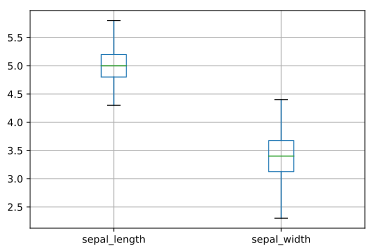

In [216]:
# And I can plot
ax = data.groupby('name').get_group('setosa').boxplot(column=["sepal_length","sepal_width"], return_type='axes')

# Plotting data

- The plot method on Series and DatFrame is just a wrapper on matplotlib plt.plot()
- Many available plots:
    - ‘bar’ or ‘barh’ for bar plots
    - ‘hist’ for histogram
    - ‘box’ for boxplot
    - ‘kde’ or 'density' for density plots • ‘area’ for area plots
    - ‘scatter’ for scatter plots
    - ‘hexbin’ for hexagonal bin plots • ‘pie’ for pie plots
    
- There are several more complex plotting functions in pandas.tools.plotting that take a Series or DataFrame as an argument. These include:
    - Scatter matrices
    - Andrews Curves
    - Autocorrelation
    - Bootstrap Plot

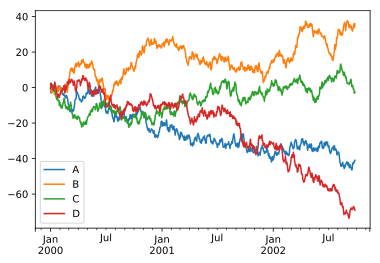

In [217]:
## Quick example
df = pd.DataFrame(np.random.randn(1000, 4), index =pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.plot()

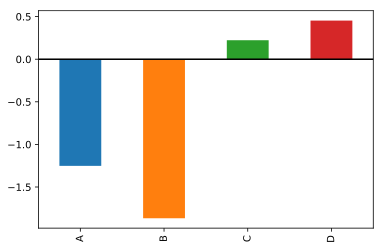

In [218]:
plt.figure()
df.iloc[5].plot(kind = 'bar')
plt.axhline(0, color = 'k')

## Lets open the supplement lecture and do things interactively

## Attribution

This notebook draws on the Jupyter Notebook lecture from the open
source [Scipy Lecture Notes][scipy-lec-notes] by Gaël Varoquaux and Joris Van den Bossche's [Pandas tutorial][pandas-tutorial].

[scipy-lec-notes]: http://www.scipy-lectures.org/
[pandas-tutorial]: https://github.com/jorisvandenbossche/pandas-tutorial

## Resources

* "Official" book by author of Pandas: [Python for Data
Analysis](http://shop.oreilly.com/product/0636920023784.do)
* [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [SciPy Lecture Notes: Statistics](http://www.scipy-
lectures.org/packages/statistics/index.html)
* [Tom Augspurger's series on modern idiomatic pandas][tom]

* Lots of tutorials on the internet, eg http://github.com/jvns/pandas-cookbook, https://github.com/brandon-rhodes/pycon-pandas-tutorial/

[tom]:https://tomaugspurger.github.io/modern-1.html


### There is another notebook associated with this lecture on the [website][lec6-nb].

#### There are also updated [exercises][wb].
[lec6-nb]: https://stanford.edu/~bmj/lectures.html
[wb]: https://stanford.edu/~bmj/ex/exercises.pdf